In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\andre\OneDrive\Desktop\Personal\Data Science\Training\Udemy Course\TensorFlow_FILES\DATA\cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:ylabel='count'>

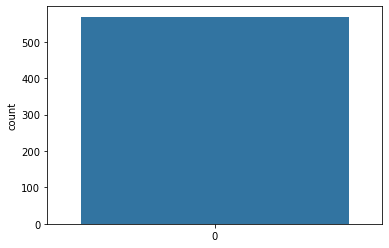

In [33]:
sns.countplot(data = df["benign_0__mal_1"])

# Scaling 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop("benign_0__mal_1", axis =1)
y= df["benign_0__mal_1"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Prediction - benign or malignant

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [13]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.065527,0.257694,0.077323,0.034369,0.487226,0.417506,0.733365,0.217445,0.504004,0.642376,...,0.059645,0.283316,0.055971,0.025084,0.523195,0.449380,1.000000,0.601375,0.524936,0.529502
1,0.656203,0.570172,0.674207,0.489402,0.554934,0.903431,0.582709,0.743539,0.655633,0.505897,...,0.657920,0.571962,0.620253,0.462832,0.529308,0.802879,0.541534,0.997595,0.499310,0.621906
2,0.072579,0.140345,0.080239,0.038831,0.221901,0.233306,0.140300,0.108350,0.626802,0.414280,...,0.048681,0.192164,0.056428,0.021462,0.184677,0.154303,0.111581,0.174811,0.338459,0.253137
3,0.144914,0.524518,0.142908,0.075774,0.396678,0.181357,0.055740,0.080268,0.389749,0.280750,...,0.130546,0.617537,0.119414,0.057587,0.534742,0.123555,0.089856,0.210859,0.363493,0.224059
4,0.121407,0.174839,0.118296,0.060714,0.548614,0.209677,0.025398,0.064115,0.841431,0.413648,...,0.085593,0.144723,0.078135,0.035977,0.382599,0.078376,0.017316,0.088625,0.392667,0.213293


### add layers and compile 

In [14]:
model = Sequential()

In [15]:
model.add( Dense(30,activation = "relu"))
model.add( Dense(15,activation = "relu"))
model.add( Dense(1,activation = "sigmoid"))

In [16]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [17]:
model.fit(X_train,y_train,epochs=600, validation_data=(X_test,y_test),use_multiprocessing=True)

Epoch 1/600
15/15 [==============================] - 1s 15ms/step - loss: 0.6758 - val_loss: 0.6498
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6445 - val_loss: 0.6161
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6130 - val_loss: 0.5817
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5782 - val_loss: 0.5447
Epoch 5/600
15/15 [==============================] - 0s 3ms/step - loss: 0.5435 - val_loss: 0.5065
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5042 - val_loss: 0.4651
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.4599 - val_loss: 0.4175
Epoch 8/600
15/15 [==============================] - 0s 6ms/step - loss: 0.4145 - val_loss: 0.3682
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3674 - val_loss: 0.3227
Epoch 10/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3289 - val_loss: 0.2848
Epoch 11

Epoch 83/600
15/15 [==============================] - 0s 10ms/step - loss: 0.0543 - val_loss: 0.0579
Epoch 84/600
15/15 [==============================] - 0s 11ms/step - loss: 0.0534 - val_loss: 0.0573
Epoch 85/600
15/15 [==============================] - 0s 12ms/step - loss: 0.0536 - val_loss: 0.0561
Epoch 86/600
15/15 [==============================] - 0s 13ms/step - loss: 0.0536 - val_loss: 0.0573
Epoch 87/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0546 - val_loss: 0.0603
Epoch 88/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0640 - val_loss: 0.0561
Epoch 89/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0546 - val_loss: 0.0554
Epoch 90/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.0581
Epoch 91/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.0568
Epoch 92/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0530 - val_loss: 0.0

15/15 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 0.0615
Epoch 165/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0614
Epoch 166/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 0.0640
Epoch 167/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0608
Epoch 168/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.0629
Epoch 169/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0654
Epoch 170/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0660
Epoch 171/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.0630
Epoch 172/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.0649
Epoch 173/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.0661
Epoc

Epoch 245/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.0697
Epoch 246/600
15/15 [==============================] - 0s 18ms/step - loss: 0.0275 - val_loss: 0.0779
Epoch 247/600
15/15 [==============================] - 0s 20ms/step - loss: 0.0272 - val_loss: 0.0732
Epoch 248/600
15/15 [==============================] - 0s 23ms/step - loss: 0.0260 - val_loss: 0.0796
Epoch 249/600
15/15 [==============================] - 0s 20ms/step - loss: 0.0289 - val_loss: 0.0736
Epoch 250/600
15/15 [==============================] - 0s 21ms/step - loss: 0.0345 - val_loss: 0.0678
Epoch 251/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0301 - val_loss: 0.0748
Epoch 252/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.0727
Epoch 253/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.0718
Epoch 254/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0254 - va

15/15 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0955
Epoch 327/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0827
Epoch 328/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0911
Epoch 329/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.0826
Epoch 330/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.1054
Epoch 331/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 0.0847
Epoch 332/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0180 - val_loss: 0.0947
Epoch 333/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0189 - val_loss: 0.0831
Epoch 334/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.0960
Epoch 335/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0926
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.1171
Epoch 408/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0149 - val_loss: 0.1028
Epoch 409/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0127 - val_loss: 0.1121
Epoch 410/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0125 - val_loss: 0.1072
Epoch 411/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.1142
Epoch 412/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.1010
Epoch 413/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.1246
Epoch 414/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.1156
Epoch 415/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.1078
Epoch 416/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0133 - val_loss: 0.1082
Epoc

15/15 [==============================] - 0s 11ms/step - loss: 0.0116 - val_loss: 0.1270
Epoch 489/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.1390
Epoch 490/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.1387
Epoch 491/600
15/15 [==============================] - ETA: 0s - loss: 0.008 - 0s 17ms/step - loss: 0.0082 - val_loss: 0.1445
Epoch 492/600
15/15 [==============================] - 0s 14ms/step - loss: 0.0084 - val_loss: 0.1368
Epoch 493/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0085 - val_loss: 0.1369
Epoch 494/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.1401
Epoch 495/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.1326
Epoch 496/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.1530
Epoch 497/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 569/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0066 - val_loss: 0.1648
Epoch 570/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.1605
Epoch 571/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.1984
Epoch 572/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.1430
Epoch 573/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.1830
Epoch 574/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.1754
Epoch 575/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.1610
Epoch 576/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.1519
Epoch 577/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.1999
Epoch 578/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0067 - val_los

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:title={'center':'Overfitted model'}, xlabel='epochs', ylabel='loss'>

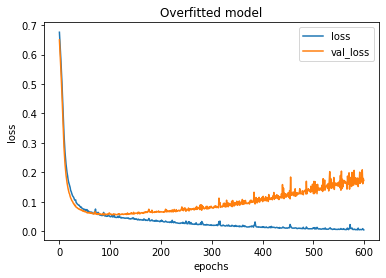

In [19]:
losses.plot(xlabel = "epochs", ylabel = "loss", title= "Overfitted model")

In [20]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1723


0.17228682339191437

# Early stopping 

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [22]:
## create new model 
model = Sequential()
model.add( Dense(30,activation = "relu"))
model.add( Dense(15,activation = "relu"))
model.add( Dense(1,activation = "sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [23]:
stopping = EarlyStopping(monitor="val_loss", mode= "min", patience=25)

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs = 600, callbacks=stopping)

Epoch 1/600
15/15 [==============================] - 1s 12ms/step - loss: 0.7072 - val_loss: 0.6765
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6606 - val_loss: 0.6289
Epoch 3/600
15/15 [==============================] - 0s 3ms/step - loss: 0.6135 - val_loss: 0.5796
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 0.5636 - val_loss: 0.5170
Epoch 5/600
15/15 [==============================] - 0s 3ms/step - loss: 0.5000 - val_loss: 0.4474
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4352 - val_loss: 0.3849
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3771 - val_loss: 0.3277
Epoch 8/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3297 - val_loss: 0.2822
Epoch 9/600
15/15 [==============================] - 0s 3ms/step - loss: 0.2933 - val_loss: 0.2504
Epoch 10/600
15/15 [==============================] - 0s 3ms/step - loss: 0.2656 - val_loss: 0.2247
Epoch 11

15/15 [==============================] - 0s 12ms/step - loss: 0.0508 - val_loss: 0.0582
Epoch 83/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.0573
Epoch 84/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0499 - val_loss: 0.0571
Epoch 85/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.0577
Epoch 86/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0551 - val_loss: 0.0636
Epoch 87/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0569 - val_loss: 0.0579
Epoch 88/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0529 - val_loss: 0.0628
Epoch 89/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0519 - val_loss: 0.0565
Epoch 90/600
15/15 [==============================] - 0s 17ms/step - loss: 0.0488 - val_loss: 0.0575
Epoch 91/600
15/15 [==============================] - 0s 19ms/step - loss: 0.0497 - val_loss: 0.0580
Epoch 92/6

<AxesSubplot:title={'center':'Early Stopping'}, xlabel='epochs', ylabel='loss'>

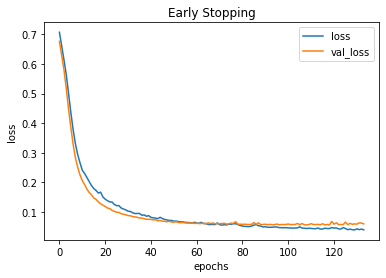

In [25]:
pd.DataFrame(model.history.history).plot(xlabel = "epochs", ylabel = "loss",title= "Early Stopping")

In [26]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.0591


0.05909647420048714

# Dropout

In [27]:
## create new model 
model = Sequential()
model.add( Dense(30,activation = "relu"))
model.add(Dropout(0.5))

model.add( Dense(15,activation = "relu"))
model.add(Dropout(0.5))

model.add( Dense(1,activation = "sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])

In [28]:
stopping = EarlyStopping(monitor="val_loss",patience = 25, mode = "min")

In [29]:
model.fit(X_train,y_train,epochs = 600, callbacks=stopping, validation_data=(X_test,y_test))

Epoch 1/600
15/15 [==============================] - 3s 93ms/step - loss: 0.6958 - accuracy: 0.4945 - val_loss: 0.6855 - val_accuracy: 0.6053
Epoch 2/600
15/15 [==============================] - 0s 20ms/step - loss: 0.6817 - accuracy: 0.5604 - val_loss: 0.6765 - val_accuracy: 0.7544
Epoch 3/600
15/15 [==============================] - 0s 20ms/step - loss: 0.6719 - accuracy: 0.6000 - val_loss: 0.6585 - val_accuracy: 0.8421
Epoch 4/600
15/15 [==============================] - 0s 22ms/step - loss: 0.6480 - accuracy: 0.6747 - val_loss: 0.6345 - val_accuracy: 0.8684
Epoch 5/600
15/15 [==============================] - 0s 20ms/step - loss: 0.6496 - accuracy: 0.6527 - val_loss: 0.6103 - val_accuracy: 0.8860
Epoch 6/600
15/15 [==============================] - 0s 21ms/step - loss: 0.6336 - accuracy: 0.6945 - val_loss: 0.5890 - val_accuracy: 0.8947
Epoch 7/600
15/15 [==============================] - 0s 21ms/step - loss: 0.6098 - accuracy: 0.7165 - val_loss: 0.5663 - val_accuracy: 0.8947
Epoch 

15/15 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.9538 - val_loss: 0.0768 - val_accuracy: 0.9737
Epoch 59/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1672 - accuracy: 0.9385 - val_loss: 0.0764 - val_accuracy: 0.9737
Epoch 60/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1455 - accuracy: 0.9626 - val_loss: 0.0731 - val_accuracy: 0.9649
Epoch 61/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1716 - accuracy: 0.9385 - val_loss: 0.0768 - val_accuracy: 0.9649
Epoch 62/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9560 - val_loss: 0.0749 - val_accuracy: 0.9737
Epoch 63/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1399 - accuracy: 0.9604 - val_loss: 0.0723 - val_accuracy: 0.9737
Epoch 64/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.9495 - val_loss: 0.0699 - val_accuracy: 0.9649
Epoch 65/600
15/15 

15/15 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.9736 - val_loss: 0.0564 - val_accuracy: 0.9737
Epoch 116/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.9692 - val_loss: 0.0573 - val_accuracy: 0.9737
Epoch 117/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9780 - val_loss: 0.0587 - val_accuracy: 0.9737
Epoch 118/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9802 - val_loss: 0.0572 - val_accuracy: 0.9737
Epoch 119/600
15/15 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9736 - val_loss: 0.0537 - val_accuracy: 0.9737
Epoch 120/600
15/15 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9626 - val_loss: 0.0532 - val_accuracy: 0.9649
Epoch 121/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9758 - val_loss: 0.0559 - val_accuracy: 0.9737
Epoch 122/600

<AxesSubplot:title={'center':'Dropout'}, xlabel='epochs', ylabel='loss/accuracy'>

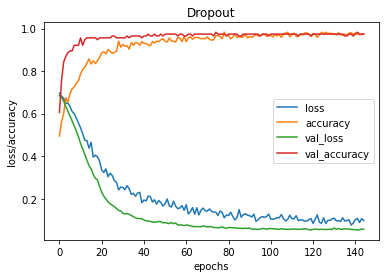

In [30]:
pd.DataFrame(model.history.history).plot(xlabel = "epochs", ylabel = "loss/accuracy", title = "Dropout")

In [31]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9737


[0.0565141923725605, 0.9736841917037964]

# Regularization 

In [41]:
from tensorflow.keras.regularizers import L1, L2

In [52]:
model = Sequential()
model.add(Dense(30,activation = "relu",kernel_regularizer=L2(l2=0.01)))
model.add(Dropout(0.5))

model.add(Dense(15,activation = "relu", kernel_regularizer=L2(l2=0.01)))
model.add(Dropout(0.5))

model.add(Dense(1,activation = "sigmoid",kernel_regularizer=L2(l2=0.01)))

model.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])

In [53]:
model.fit(X_train,y_train,epochs = 600, callbacks=stopping, validation_data=(X_test,y_test))

Epoch 1/600
15/15 [==============================] - 1s 12ms/step - loss: 1.2052 - accuracy: 0.4791 - val_loss: 1.1583 - val_accuracy: 0.5789
Epoch 2/600
15/15 [==============================] - 0s 3ms/step - loss: 1.1424 - accuracy: 0.5275 - val_loss: 1.1027 - val_accuracy: 0.6228
Epoch 3/600
15/15 [==============================] - 0s 3ms/step - loss: 1.0883 - accuracy: 0.6088 - val_loss: 1.0523 - val_accuracy: 0.6228
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 1.0445 - accuracy: 0.6286 - val_loss: 1.0061 - val_accuracy: 0.6228
Epoch 5/600
15/15 [==============================] - 0s 3ms/step - loss: 1.0003 - accuracy: 0.6857 - val_loss: 0.9643 - val_accuracy: 0.6228
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 0.9634 - accuracy: 0.6352 - val_loss: 0.9252 - val_accuracy: 0.6316
Epoch 7/600
15/15 [==============================] - 0s 3ms/step - loss: 0.9207 - accuracy: 0.6989 - val_loss: 0.8857 - val_accuracy: 0.6667
Epoch 8/600


Epoch 59/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.9341 - val_loss: 0.2756 - val_accuracy: 0.9649
Epoch 60/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.9363 - val_loss: 0.2733 - val_accuracy: 0.9561
Epoch 61/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.9231 - val_loss: 0.2739 - val_accuracy: 0.9737
Epoch 62/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.9385 - val_loss: 0.2748 - val_accuracy: 0.9649
Epoch 63/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.9385 - val_loss: 0.2711 - val_accuracy: 0.9737
Epoch 64/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3444 - accuracy: 0.9429 - val_loss: 0.2696 - val_accuracy: 0.9649
Epoch 65/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3413 - accuracy: 0.9385 - val_loss: 0.2712 - val_accuracy: 0.9737
Epoch 

15/15 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.9429 - val_loss: 0.2490 - val_accuracy: 0.9825
Epoch 117/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3190 - accuracy: 0.9495 - val_loss: 0.2489 - val_accuracy: 0.9825
Epoch 118/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 0.9495 - val_loss: 0.2502 - val_accuracy: 0.9649
Epoch 119/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.9582 - val_loss: 0.2487 - val_accuracy: 0.9825
Epoch 120/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.9385 - val_loss: 0.2499 - val_accuracy: 0.9737
Epoch 121/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.9407 - val_loss: 0.2501 - val_accuracy: 0.9825
Epoch 122/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.9407 - val_loss: 0.2541 - val_accuracy: 0.9737
Epoch 123/600

15/15 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.9429 - val_loss: 0.2446 - val_accuracy: 0.9825
Epoch 174/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.9451 - val_loss: 0.2443 - val_accuracy: 0.9825
Epoch 175/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.9473 - val_loss: 0.2442 - val_accuracy: 0.9737
Epoch 176/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.9429 - val_loss: 0.2452 - val_accuracy: 0.9737
Epoch 177/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.9363 - val_loss: 0.2444 - val_accuracy: 0.9737
Epoch 178/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3225 - accuracy: 0.9363 - val_loss: 0.2450 - val_accuracy: 0.9737
Epoch 179/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.9495 - val_loss: 0.2446 - val_accuracy: 0.9737
Epoch 180/600

In [56]:
history = model.history.history

<AxesSubplot:>

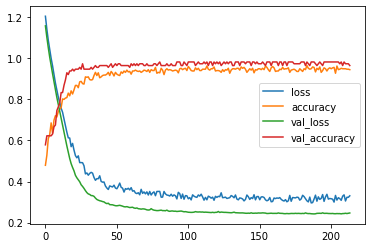

In [58]:
pd.DataFrame(history).plot()

In [59]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.9649


[0.24679355323314667, 0.9649122953414917]